# Global inflation (1970-2022) analysis

### The purpose of this analysis is to reflect the general trends of inflation levels of all countries by year, to determine abnormal inflation levels, their cause and remove them from the analysis, to compare different variations of average inflation levels.

First, we import the necessary libraries and CSV

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We look at the first 5 lines of the table in order to understand what it contains

In [3]:
pd.options.display.float_format = '{:.8f}'.format

In [4]:
data = pd.read_csv('C:\PytonDataSets\Global Dataset of Inflation.csv', encoding='cp1252')
data.head()

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,ABW,314.00000000,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,4.26000000,1.22000000,0.74000000,6.04000000,Annual average inflation,NaN,NaN,NaN,NaN,NaN
1,AFG,512.00000000,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51000000,25.51000000,-12.52000000,-10.68000000,10.23000000,...,2.30000000,5.44000000,5.06000000,NaN,Annual average inflation,NaN,NaN,NaN,NaN,NaN
2,AGO,614.00000000,Angola,Inflation,Headline Consumer Price Inflation,7.97000000,5.78000000,15.80000000,15.67000000,27.42000000,...,17.08000000,21.02000000,23.85000000,21.35000000,Annual average inflation,NaN,NaN,NaN,NaN,NaN
3,ALB,914.00000000,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.41000000,1.62000000,2.04000000,6.73000000,Annual average inflation,NaN,NaN,NaN,NaN,NaN
4,ARE,466.00000000,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98000000,21.98000000,21.98000000,21.98000000,21.98000000,...,-1.93000000,-2.08000000,0.18000000,5.22000000,Annual average inflation,NaN,NaN,NaN,NaN,NaN


Next, it is worth analyzing the general information about the table. The most important data we need is the size of the table and the presence of null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      783 non-null    object 
 1   IMF Country Code  781 non-null    float64
 2   Country           783 non-null    object 
 3   Indicator Type    783 non-null    object 
 4   Series Name       783 non-null    object 
 5   1970              422 non-null    float64
 6   1971              428 non-null    float64
 7   1972              430 non-null    float64
 8   1973              430 non-null    float64
 9   1974              434 non-null    float64
 10  1975              434 non-null    float64
 11  1976              430 non-null    float64
 12  1977              427 non-null    float64
 13  1978              428 non-null    float64
 14  1979              428 non-null    float64
 15  1980              433 non-null    float64
 16  1981              451 non-null    float64
 1

We can see that the last 5 columns, in addition to having an uninformative name, are also completely composed of null values, which means that we do not need this data, so we delete it

In [6]:
data = data.drop(data.columns[-5:], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 59 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      783 non-null    object 
 1   IMF Country Code  781 non-null    float64
 2   Country           783 non-null    object 
 3   Indicator Type    783 non-null    object 
 4   Series Name       783 non-null    object 
 5   1970              422 non-null    float64
 6   1971              428 non-null    float64
 7   1972              430 non-null    float64
 8   1973              430 non-null    float64
 9   1974              434 non-null    float64
 10  1975              434 non-null    float64
 11  1976              430 non-null    float64
 12  1977              427 non-null    float64
 13  1978              428 non-null    float64
 14  1979              428 non-null    float64
 15  1980              433 non-null    float64
 16  1981              451 non-null    float64
 1

Looking at the result, we also see:
1) There are missing values in our main data by year
2) There are columns that will not be used in the analysis, so it is better to remove them as well

In [7]:
data = data.drop(['IMF Country Code', 'Indicator Type', 'Note', 'Series Name'], axis=1)

Each row shows the data of a specific country, we have 783 rows, but according to different data, there are about 200 countries in the world, that is, most likely we are dealing with duplicates, so we can try to remove duplicates and see the result

In [8]:
data = data.drop_duplicates(subset=['Country']).reset_index()
data = data.drop_duplicates(subset=['Country Code']).reset_index()

It will also be more comfortable to work with data if we set country names as indices

In [9]:
data.set_index('Country', inplace=True)

In [10]:
data = data.drop(data.columns[0], axis=1)
data

,index,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.37000000,0.42000000,0.48000000,-0.89000000,-0.47000000,3.58000000,4.26000000,1.22000000,0.74000000,6.04000000
Afghanistan,1,AFG,25.51000000,25.51000000,-12.52000000,-10.68000000,10.23000000,11.85000000,0.60000000,7.65000000,...,7.39000000,4.67000000,-0.66000000,4.38000000,4.98000000,0.63000000,2.30000000,5.44000000,5.06000000,NaN
Angola,2,AGO,7.97000000,5.78000000,15.80000000,15.67000000,27.42000000,29.00000000,80.70000000,69.01000000,...,8.78000000,7.30000000,9.16000000,32.38000000,29.84000000,19.63000000,17.08000000,21.02000000,23.85000000,21.35000000
Albania,3,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.93000000,1.62000000,1.91000000,1.29000000,1.99000000,2.03000000,1.41000000,1.62000000,2.04000000,6.73000000
United Arab Emirates,4,ARE,21.98000000,21.98000000,21.98000000,21.98000000,21.98000000,21.98000000,21.98000000,21.97000000,...,1.09000000,2.34000000,4.07000000,1.62000000,1.97000000,3.06000000,-1.93000000,-2.08000000,0.18000000,5.22000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Saint Helena,200,SHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.70000000,2.10000000,1.90000000,2.60000000,5.10000000,3.80000000,3.30000000,1.10000000,1.30000000,NaN
Timor-Leste,201,TLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.99000000,0.85000000,0.65000000,-1.47000000,0.52000000,2.29000000,0.96000000,NaN,NaN,NaN
Turks and Caicos Islands,202,TCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.50000000,2.30000000,2.20000000,2.00000000,2.10000000,2.10000000,2.20000000,2.30000000,NaN,NaN


Now we need to consider the basic statistical measures of our data to understand how they are distributed

In [11]:
data.describe()

,index,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,205.00000000,155.00000000,155.00000000,155.00000000,156.00000000,156.00000000,154.00000000,154.00000000,154.00000000,155.00000000,...,202.00000000,202.00000000,202.00000000,202.00000000,201.00000000,201.00000000,201.00000000,199.00000000,198.00000000,191.00000000
mean,106.40000000,6.12387097,6.49890323,8.10767742,15.71000000,23.07788462,18.39896104,15.99441558,15.88844156,12.88283871,...,4.61000000,4.00173267,4.25683168,6.94113861,7.38751244,329.67995025,104.13154229,104.66532663,16.32338384,14.58157068
std,79.94891751,6.39992455,8.17023165,11.16446548,31.84940072,43.97595814,34.24279706,40.46325124,21.28565398,18.44069993,...,8.17070888,6.72420078,10.86023358,32.46758051,33.74405232,4610.82584650,1403.83398481,1222.03430924,115.99704415,30.63191185
min,0.00000000,-5.30000000,-3.10000000,-12.52000000,-10.68000000,-0.10000000,-34.41000000,-8.40000000,-1.16000000,-15.87000000,...,-2.37000000,-1.41000000,-3.75000000,-3.09000000,-13.31000000,-14.40000000,-16.36000000,-2.60000000,-3.01000000,1.05000000
25%,51.00000000,2.44500000,2.21500000,3.72500000,6.65500000,11.46000000,8.49000000,4.98250000,6.74000000,5.26000000,...,1.38500000,0.64250000,0.13000000,0.18000000,1.14000000,1.27000000,0.88000000,0.43000000,1.76250000,5.52000000
50%,102.00000000,4.37000000,4.78000000,6.01000000,10.16000000,16.93500000,12.90000000,9.26500000,10.98500000,8.52000000,...,2.54500000,2.18000000,1.60000000,1.64000000,2.22000000,2.33000000,2.20000000,2.21000000,3.34000000,7.90000000
75%,153.00000000,7.15000000,6.79500000,8.33000000,15.60000000,24.00000000,19.15750000,15.21500000,15.62000000,13.10000000,...,5.72750000,5.15500000,4.63500000,5.17750000,5.10000000,4.20000000,4.13000000,4.48500000,5.90500000,12.67000000
max,661.00000000,36.80000000,71.30000000,77.80000000,352.81000000,504.74000000,374.74000000,443.97000000,176.00000000,175.51000000,...,90.00000000,62.14000000,121.40000000,379.85000000,438.12000000,65374.08000000,19906.02000000,17087.72000000,1588.51000000,284.94000000


At the moment, we can observe the following in overview:
There is a significant difference between the indicators of the arithmetic mean, standard deviation, maximum/minimum values, so I suggest considering what the maximum values were in all years

In [12]:
data.max()

index                     661
Country Code              ZWE
1970              36.80000000
1971              71.30000000
1972              77.80000000
1973             352.81000000
1974             504.74000000
1975             374.74000000
1976             443.97000000
1977             176.00000000
1978             175.51000000
1979             159.51000000
1980             188.82000000
1981             116.80000000
1982             164.78000000
1983             343.81000000
1984            1289.54000000
1985           11702.83000000
1986             885.20000000
1987           13109.50000000
1988            4775.20000000
1989            7428.70000000
1990            7356.82000000
1991            2154.44000000
1992            4129.17000000
1993            4660.58000000
1994           23773.10000000
1995            2672.23000000
1996            4146.01000000
1997            1037.48000000
1998             107.43000000
1999             294.64000000
2000             550.00000000
2001      

You can observe a very heterogeneous picture, it is worth considering what happened in a particular year

In [13]:
data['2018'].sort_values(ascending=False)

Country
Venezuela, RB          65374.08000000
South Sudan               83.49000000
Sudan                     63.29000000
Argentina                 34.28000000
Congo, Dem. Rep.          29.27000000
                            ...      
Eritrea                  -14.40000000
Syrian Arab Republic              NaN
Martinique                        NaN
Niue                              NaN
Somalia                           NaN
Name: 2018, Length: 205, dtype: float64

## In general, we can observe a significant impact on the average inflation of only one country - Venezuela, here we understand that if we leave everything as it is, it will significantly distort the results of the analysis
##### Inflation in 2018, according to estimates by the Parliamentary Committee on Finance, amounted to 1,700,000% (according to the IMF - 1,370,000%), GDP decreased by 15%, more than 3 million people left the country, Venezuela ranks 169th (out of 180) in According to the Corruption Perceptions Index, approximately 30% of the population is unemployed. As one of the world's largest oil producers, the country is nevertheless experiencing an acute shortage of basic necessities, food, medicine and gasoline.
##### In addition to the fall in oil prices, the media also point to other causes of the crisis: a significant amount of social subsidies to the population, significant costs for improving the image of the authorities and the state, the lack of reforms, debt on external loans.
##### The main and fundamental cause of the crisis is the Chavista policy of "world socialist revolution" and the victory over the "American imperialists", carried out by the socialist presidents Chavez and Maduro.
##### In November 2014, the Venezuelan authorities introduced "fair prices" for most goods. This led to a commodity shortage. Next, a card system was introduced, when you can buy only with a special number on hand.

In [14]:
data['1987'].sort_values(ascending=False)

Country
Nicaragua                  13109.50000000
Lebanon                      487.20000000
Vietnam                      360.36000000
Brazil                       228.34000000
Uganda                       215.40000000
                                ...      
Niue                                  NaN
Saint Helena                          NaN
Timor-Leste                           NaN
Turks and Caicos Islands              NaN
Somalia                               NaN
Name: 1987, Length: 205, dtype: float64

## And again, one can observe a significant difference in the level of inflation of one country from all others - Nicaragua
##### After 1985, the government decided to fill the gap between declining revenues and skyrocketing military spending by printing large amounts of paper money. Inflation soared, peaking in 1987 at over 14,000% per year.
##### Measures taken by the government to reduce inflation were largely nullified by the natural disaster. In early 1988, the administration of Daniel Ortega (coordinator of the Sandinista junta from 1979 to 1985, president from 1985 to 1990) implemented an austerity program to reduce inflation. Price controls were tightened and a new currency was introduced. As a result, by August 1988, inflation fell to an annual rate of 240%. However, the following month, Hurricane Joan cut a destructive path right through the center of the country. Damages were substantial, and the government's massive infrastructure spending program undermined its anti-inflationary measures.

In [15]:
data.min()

index                     0
Country Code            ABW
1970            -5.30000000
1971            -3.10000000
1972           -12.52000000
1973           -10.68000000
1974            -0.10000000
1975           -34.41000000
1976            -8.40000000
1977            -1.16000000
1978           -15.87000000
1979           -11.82000000
1980            -7.35000000
1981           -27.50000000
1982            -2.40000000
1983            -8.45000000
1984            -7.36000000
1985           -16.01000000
1986           -17.64000000
1987           -31.25000000
1988           -13.01000000
1989            -9.58000000
1990           -26.32000000
1991           -13.14000000
1992           -71.33000000
1993           -10.87000000
1994            -2.76000000
1995            -2.93000000
1996           -16.10000000
1997           -10.00000000
1998           -28.02000000
1999           -13.43000000
2000            -3.90000000
2001           -43.40000000
2002           -34.44000000
2003            -8.5

In [16]:
data['2007'].sort_values()

Country
Zimbabwe                 -72.73000000
Chad                      -7.44000000
Gabon                     -1.02000000
Burkina Faso              -0.23000000
Japan                      0.06000000
                             ...     
British Virgin Islands            NaN
Liechtenstein                     NaN
Martinique                        NaN
Niue                              NaN
Somalia                           NaN
Name: 2007, Length: 205, dtype: float64

## Not only a significant increase in the level of inflation above the norm is a reason for attention, but also a negative level atypical for the economy, in this case it is worth paying attention to Zimbabwe
##### In 2007, the government declared inflation illegal. Anyone who raised the prices for goods and services was subject to arrest. This amounted to a price freeze, which is usually ineffective in halting inflation. Officials arrested numerous corporate executives for changing their prices.

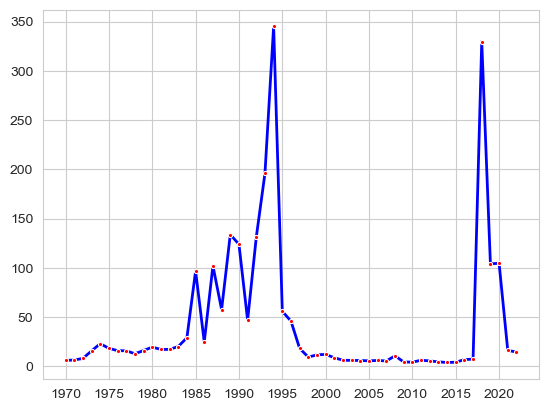

In [17]:
mean = data.iloc[:, 2:].mean(numeric_only=True)
sns.set_style("whitegrid")
sns.lineplot(data=mean, color="blue", linewidth=2, marker="o", markersize=3, markerfacecolor="red")
plt.xticks(mean.index[::5])
plt.show(block=False)

Since our task is to determine the general trends that were inherent in most countries, it is necessary to remove such values, because they significantly distort the results
Since our task is to determine the general trends that were characteristic of most countries, it is necessary to remove such values, because they significantly distort the results, therefore, in the future, it is necessary to discard all values that do not correspond to the normal

In [18]:
column_to_clean = data.iloc[:, 1:]

lower_quantile = column_to_clean.quantile(0.02, numeric_only=True)
upper_quantile = column_to_clean.quantile(0.98, numeric_only=True)

columns_cleaned = column_to_clean.mask((column_to_clean < lower_quantile) | (column_to_clean > upper_quantile), np.nan)
data_cleaned = pd.concat([data.drop(column_to_clean.columns, axis=1), columns_cleaned], axis=1)
data_cleaned.describe()

C:\Users\Intel\AppData\Local\Temp\ipykernel_21860\2158714003.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  columns_cleaned = column_to_clean.mask((column_to_clean < lower_quantile) | (column_to_clean > upper_quantile), np.nan)


,index,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,205.00000000,147.00000000,147.00000000,147.00000000,151.00000000,148.00000000,148.00000000,146.00000000,146.00000000,147.00000000,...,192.00000000,192.00000000,192.00000000,192.00000000,193.00000000,193.00000000,193.00000000,191.00000000,190.00000000,183.00000000
mean,106.40000000,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,11.27530612,...,3.67572917,3.25442708,3.04291667,3.38598958,4.17766839,3.77808290,3.57196891,3.94240838,5.45210526,10.73202186
std,79.94891751,4.89290092,5.30635246,5.64308161,8.63106966,10.24247955,8.66774445,10.40466298,11.86477468,10.39186578,...,3.14424888,3.39492780,4.22593276,4.96720671,5.39232530,4.56512880,5.79235939,6.98272217,7.90959251,10.28898615
min,0.00000000,-0.86000000,-1.27000000,-3.60000000,0.00000000,0.10000000,0.10000000,-2.43000000,0.30000000,-1.58000000,...,-0.51000000,-1.03000000,-2.10000000,-1.47000000,-0.22000000,-0.22000000,-2.09000000,-1.89000000,-0.23000000,1.77000000
25%,51.00000000,2.55500000,2.47500000,3.79500000,6.59000000,11.89250000,8.57000000,5.05000000,7.03250000,5.64500000,...,1.43250000,0.77000000,0.16500000,0.23500000,1.16000000,1.32000000,0.95000000,0.48000000,1.85250000,5.63000000
50%,102.00000000,4.37000000,4.78000000,6.01000000,10.03000000,16.93500000,12.82500000,9.26500000,10.98500000,8.52000000,...,2.54500000,2.18000000,1.60000000,1.64000000,2.22000000,2.33000000,2.20000000,2.21000000,3.34000000,7.90000000
75%,153.00000000,6.92000000,6.65500000,8.18000000,15.25000000,23.72000000,18.82500000,14.08500000,14.79000000,12.80500000,...,5.62250000,5.01500000,4.52000000,4.95500000,4.98000000,4.08000000,3.91000000,4.00500000,5.79250000,12.09000000
max,661.00000000,22.26000000,23.95000000,26.86000000,61.25000000,55.00000000,49.43000000,56.08000000,69.01000000,50.55000000,...,18.33000000,18.09000000,26.00000000,25.88000000,30.40000000,29.27000000,50.99000000,49.77000000,59.11000000,72.43000000


By removing only 2% of the largest and 2% of the smallest values, you can observe significant changes in statistics, the data became much more visible.
All missing values can simply be replaced with averages, this will not greatly affect the study

In [19]:
data_cleaned = data_cleaned.fillna(data_cleaned.mean(numeric_only=True))
data_cleaned

,index,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,0,ABW,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,...,3.67572917,0.42000000,0.48000000,-0.89000000,4.17766839,3.58000000,4.26000000,1.22000000,0.74000000,6.04000000
Afghanistan,1,AFG,5.71571429,5.83408163,6.97108844,11.83291391,10.23000000,11.85000000,0.60000000,7.65000000,...,7.39000000,4.67000000,-0.66000000,4.38000000,4.98000000,0.63000000,2.30000000,5.44000000,5.06000000,10.73202186
Angola,2,AGO,7.97000000,5.78000000,15.80000000,15.67000000,27.42000000,29.00000000,11.42602740,69.01000000,...,8.78000000,7.30000000,9.16000000,3.38598958,29.84000000,19.63000000,17.08000000,21.02000000,23.85000000,21.35000000
Albania,3,ALB,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,...,1.93000000,1.62000000,1.91000000,1.29000000,1.99000000,2.03000000,1.41000000,1.62000000,2.04000000,6.73000000
United Arab Emirates,4,ARE,21.98000000,21.98000000,21.98000000,21.98000000,21.98000000,21.98000000,21.98000000,21.97000000,...,1.09000000,2.34000000,4.07000000,1.62000000,1.97000000,3.06000000,-1.93000000,3.94240838,0.18000000,5.22000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Saint Helena,200,SHN,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,...,1.70000000,2.10000000,1.90000000,2.60000000,5.10000000,3.80000000,3.30000000,1.10000000,1.30000000,10.73202186
Timor-Leste,201,TLS,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,...,10.99000000,0.85000000,0.65000000,-1.47000000,0.52000000,2.29000000,0.96000000,3.94240838,5.45210526,10.73202186
Turks and Caicos Islands,202,TCA,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,...,2.50000000,2.30000000,2.20000000,2.00000000,2.10000000,2.10000000,2.20000000,2.30000000,5.45210526,10.73202186


In [20]:
data_cleaned.describe()

,index,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,205.00000000,205.00000000,205.00000000,205.00000000,205.00000000,205.00000000,205.00000000,205.00000000,205.00000000,205.00000000,...,205.00000000,205.00000000,205.00000000,205.00000000,205.00000000,205.00000000,205.00000000,205.00000000,205.00000000,205.00000000
mean,106.40000000,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,11.27530612,...,3.67572917,3.25442708,3.04291667,3.38598958,4.17766839,3.77808290,3.57196891,3.94240838,5.45210526,10.73202186
std,79.94891751,4.13930822,4.48908095,4.77394790,7.40108117,8.69458163,7.35782887,8.77196590,10.00295724,8.79133588,...,3.04241543,3.28497556,4.08906658,4.80633274,5.23132395,4.42882547,5.61941402,6.73886070,7.61324715,9.71836470
min,0.00000000,-0.86000000,-1.27000000,-3.60000000,0.00000000,0.10000000,0.10000000,-2.43000000,0.30000000,-1.58000000,...,-0.51000000,-1.03000000,-2.10000000,-1.47000000,-0.22000000,-0.22000000,-2.09000000,-1.89000000,-0.23000000,1.77000000
25%,51.00000000,3.45000000,3.64000000,4.99000000,7.66000000,13.52000000,10.13000000,7.04000000,8.35000000,6.69000000,...,1.47000000,0.89000000,0.31000000,0.32000000,1.20000000,1.37000000,1.00000000,0.54000000,1.97000000,5.83000000
50%,102.00000000,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,11.14000000,...,2.78000000,2.56000000,1.89000000,1.92000000,2.43000000,2.51000000,2.31000000,2.44000000,3.62000000,8.40000000
75%,153.00000000,5.86000000,5.84000000,7.07000000,12.10000000,20.03000000,16.77000000,11.42602740,13.52157534,11.27530612,...,5.50000000,4.63000000,4.39000000,4.31000000,4.62000000,3.92000000,3.72000000,3.94240838,5.45210526,11.32000000
max,661.00000000,22.26000000,23.95000000,26.86000000,61.25000000,55.00000000,49.43000000,56.08000000,69.01000000,50.55000000,...,18.33000000,18.09000000,26.00000000,25.88000000,30.40000000,29.27000000,50.99000000,49.77000000,59.11000000,72.43000000


In [21]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, Aruba to Taiwan, China
Data columns (total 55 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         205 non-null    int64  
 1   Country Code  205 non-null    object 
 2   1970          205 non-null    float64
 3   1971          205 non-null    float64
 4   1972          205 non-null    float64
 5   1973          205 non-null    float64
 6   1974          205 non-null    float64
 7   1975          205 non-null    float64
 8   1976          205 non-null    float64
 9   1977          205 non-null    float64
 10  1978          205 non-null    float64
 11  1979          205 non-null    float64
 12  1980          205 non-null    float64
 13  1981          205 non-null    float64
 14  1982          205 non-null    float64
 15  1983          205 non-null    float64
 16  1984          205 non-null    float64
 17  1985          205 non-null    float64
 18  1986          205 non

As a result we have:
1) 205 countries (significantly closer to the real number)
2) all values are present in all years, all of them can be included in calculations

In [22]:
data_cleaned['2018'].sort_values(ascending=False)

Country
Congo, Dem. Rep.     29.27000000
Yemen, Rep.          27.60000000
Liberia              23.56000000
Angola               19.63000000
Iran, Islamic Rep.   17.95000000
                         ...    
Qatar                 0.22000000
Brunei Darussalam     0.15000000
Djibouti              0.15000000
West Bank and Gaza   -0.20000000
Ecuador              -0.22000000
Name: 2018, Length: 205, dtype: float64

In [23]:
data_cleaned.max()

index                    661
Country Code             ZWE
1970             22.26000000
1971             23.95000000
1972             26.86000000
1973             61.25000000
1974             55.00000000
1975             49.43000000
1976             56.08000000
1977             69.01000000
1978             50.55000000
1979             78.31000000
1980             94.26000000
1981            100.00000000
1982            100.54000000
1983            135.03000000
1984            141.30000000
1985            225.99000000
1986            143.80000000
1987            215.40000000
1988            342.95000000
1989           1281.44000000
1990            600.00000000
1991            216.40000000
1992           1243.00000000
1993           2600.72000000
1994           2075.89000000
1995            541.80000000
1996            125.53000000
1997             87.96000000
1998             59.01000000
1999             85.75000000
2000             70.00000000
2001             54.40000000
2002          

But even after such transformations, there are still values that stand out strongly, for example - the year 1993

In [24]:
data_cleaned['1993'].sort_values(ascending=False)

Country
Tajikistan         2600.72000000
Congo, Dem. Rep.   1986.90000000
Brazil             1927.38000000
Kazakhstan         1662.28000000
Croatia            1523.68000000
                        ...     
Niger                -0.33000000
Seychelles           -0.34000000
Mali                 -0.57000000
Senegal              -0.74000000
Qatar                -0.86000000
Name: 1993, Length: 205, dtype: float64

But looking at this year in more detail, you can clearly see that such a high level of inflation is characteristic of many countries in that year, so it corresponds to a more general trend

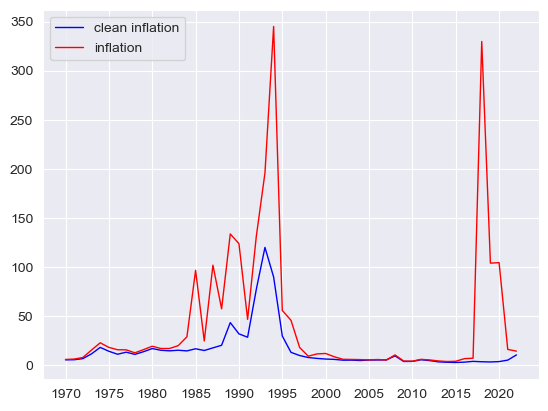

In [25]:
mean2 = data_cleaned.iloc[:, 2:].mean(numeric_only=True)
sns.set_style("darkgrid")
sns.lineplot(data=mean2, color="blue", linewidth=1, label="clean inflation")
sns.lineplot(data=mean, color="red", linewidth=1, label="inflation")
plt.xticks(mean2.index[::5])
plt.legend()
plt.show(block=False)

After constructing a graph of the average values of inflation for the selected time period based on the initial and cleaned data, it can be observed that the graph has become more even and now it turns out that in 2018 the level of inflation in most countries was quite normal

In [26]:
top_data = data.mean(axis=1, numeric_only=True).sort_values(ascending=False).head(10).sort_values(ascending=True)
top_data_cleaned = data_cleaned.mean(axis=1, numeric_only=True).sort_values(ascending=False).head(10).sort_values(ascending=True)
low_data = data.mean(axis=1, numeric_only=True).sort_values().head(10)
low_data_cleaned = data_cleaned.mean(axis=1, numeric_only=True).sort_values().head(10)

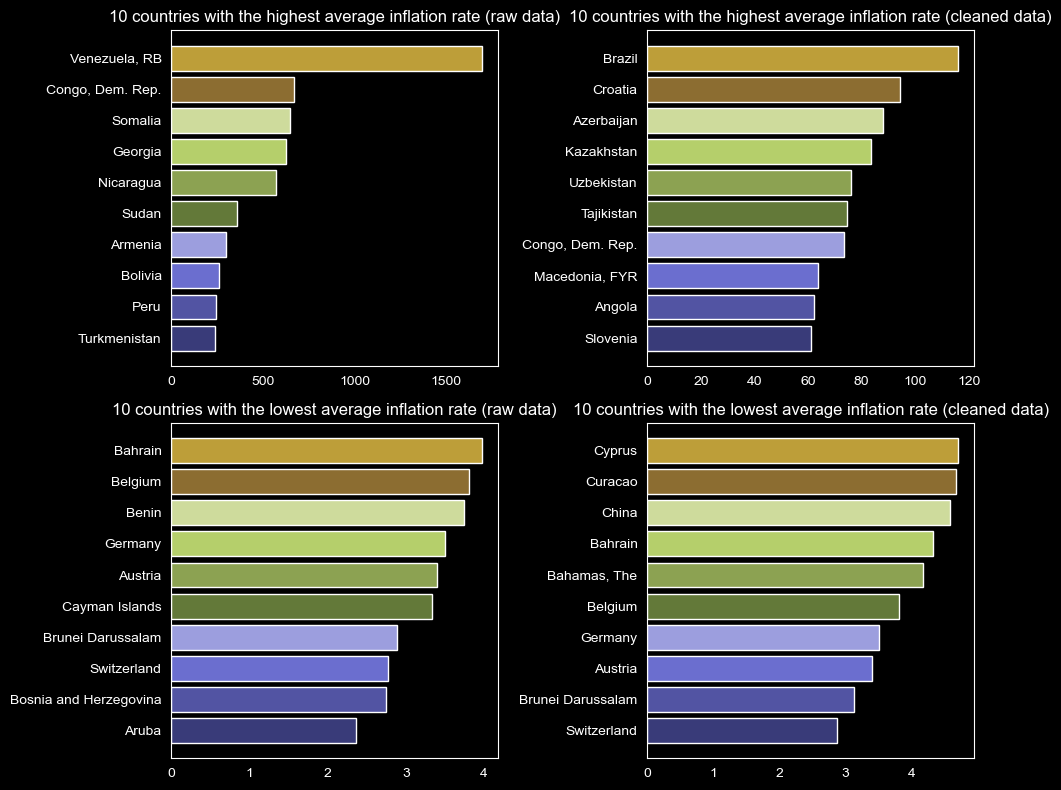

In [62]:
plt.style.use('dark_background')
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


axs[0, 0].barh(top_data.index, top_data.values, color=sns.color_palette('tab20b'))
axs[0, 0].set_title('10 countries with the highest average inflation rate (raw data)')

axs[0, 1].barh(top_data_cleaned.index, top_data_cleaned.values, color=sns.color_palette('tab20b'))
axs[0, 1].set_title('10 countries with the highest average inflation rate (cleaned data)')

axs[1, 0].barh(low_data.index, low_data.values, color=sns.color_palette('tab20b'))
axs[1, 0].set_title('10 countries with the lowest average inflation rate (raw data)')

axs[1, 1].barh(low_data_cleaned.index, low_data_cleaned.values, color=sns.color_palette('tab20b'))
axs[1, 1].set_title('10 countries with the lowest average inflation rate (cleaned data)')

plt.tight_layout()
plt.show(block=False)

These charts show the main changes in the top 10 countries with the highest/lowest inflation rates.

But there is another problem, very small countries have the same influence on statistics as economic giants and this can also partly distort the very understanding of inflation for certain years, so I propose an approach that will be based on the inclusion of the population in the analysis, and more specifically - parts of each country in the total number

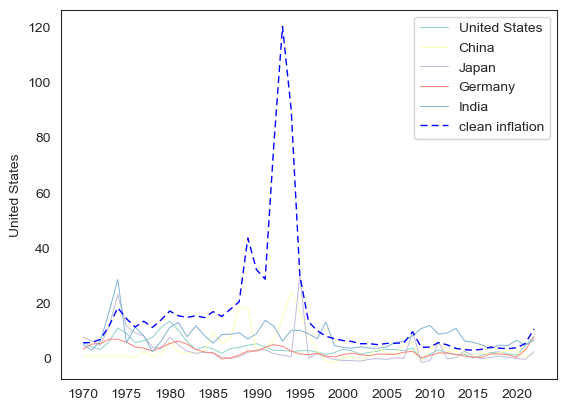

In [58]:
sns.set_style("white")
country_list = ['United States', 'China', 'Japan', 'Germany', 'India']
top_gdp = data_cleaned.loc[country_list].iloc[:, 2:]

dashes_style = (5, 3)

for i in range(0, 5):
    sns.lineplot(data=top_gdp.iloc[i], linewidth=0.7, label=country_list[i])

sns.lineplot(data=mean2, color="blue", linewidth=1, dashes=dashes_style, label="clean inflation")

plt.xticks(mean2.index[::5])
plt.legend()
plt.show(block=False)

In [29]:
population_raw = pd.read_csv("C:\PytonDataSets\world_population.csv", encoding='cp1252')
population_raw.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (kmÂ²),Density (per kmÂ²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.05870000,1.02570000,0.52000000
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.87020000,0.99570000,0.04000000
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.85310000,1.01640000,0.56000000
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.47740000,0.98310000,0.00000000
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.56410000,1.01000000,0.00000000


We will focus on the population of countries in 2022, so we only need the column "Population 2022", as well as the country code, by which we will connect the dataframes

In [30]:
population_raw = population_raw[["CCA3", "2022 Population"]]
print(population_raw["2022 Population"].isna().sum())
print(len(population_raw["CCA3"].unique()))

0
234


As a result, we have 234 unique values (countries) and all of them are non-zero

In [31]:
data_cleaned['Country Code'].isin(population_raw["CCA3"]).sort_values()

Country
Saint Helena            False
Kosovo                  False
Aruba                    True
Netherlands              True
Norway                   True
                        ...  
Guatemala                True
Guyana                   True
Hong Kong SAR, China     True
Georgia                  True
Taiwan, China            True
Name: Country Code, Length: 205, dtype: bool

We also learn that some countries do not match, but they are few and the countries themselves are small, so this will not significantly affect the analysis and we remove them

In [32]:
data_cleaned = data_cleaned.drop(index=['Saint Helena', 'Kosovo'])

In [33]:
population_raw = population_raw.rename(columns={'CCA3': 'Country Code'})

In [34]:
merged = data_cleaned.merge(population_raw, on='Country Code', how='left')
merged.set_index(data_cleaned.index, inplace=True)

In [35]:
total_population = merged['2022 Population'].sum()
merged['Population Ratio'] = merged['2022 Population'] / total_population
merged['Population Ratio'] = merged['Population Ratio']
merged

,index,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2015,2016,2017,2018,2019,2020,2021,2022,2022 Population,Population Ratio
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,0,ABW,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,...,0.48000000,-0.89000000,4.17766839,3.58000000,4.26000000,1.22000000,0.74000000,6.04000000,106445,0.00001342
Afghanistan,1,AFG,5.71571429,5.83408163,6.97108844,11.83291391,10.23000000,11.85000000,0.60000000,7.65000000,...,-0.66000000,4.38000000,4.98000000,0.63000000,2.30000000,5.44000000,5.06000000,10.73202186,41128771,0.00518507
Angola,2,AGO,7.97000000,5.78000000,15.80000000,15.67000000,27.42000000,29.00000000,11.42602740,69.01000000,...,9.16000000,3.38598958,29.84000000,19.63000000,17.08000000,21.02000000,23.85000000,21.35000000,35588987,0.00448667
Albania,3,ALB,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,...,1.91000000,1.29000000,1.99000000,2.03000000,1.41000000,1.62000000,2.04000000,6.73000000,2842321,0.00035833
United Arab Emirates,4,ARE,21.98000000,21.98000000,21.98000000,21.98000000,21.98000000,21.98000000,21.98000000,21.97000000,...,4.07000000,1.62000000,1.97000000,3.06000000,-1.93000000,3.94240838,0.18000000,5.22000000,9441129,0.00119023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Niue,199,NIU,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,...,3.04291667,3.38598958,4.17766839,3.77808290,3.57196891,3.94240838,5.45210526,10.73202186,1934,0.00000024
Timor-Leste,201,TLS,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,...,0.65000000,-1.47000000,0.52000000,2.29000000,0.96000000,3.94240838,5.45210526,10.73202186,1341296,0.00016910
Turks and Caicos Islands,202,TCA,5.71571429,5.83408163,6.97108844,11.83291391,18.39864865,14.46114865,11.42602740,13.52157534,...,2.20000000,2.00000000,2.10000000,2.10000000,2.20000000,2.30000000,5.45210526,10.73202186,45703,0.00000576


Having made certain preparations, we combine the data of two dataframes and save the indices as country names

In [36]:
for index in range(2, 55):
    merged.iloc[:, index] =  merged.iloc[:, index] * merged["Population Ratio"]
    
merged

,index,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2015,2016,2017,2018,2019,2020,2021,2022,2022 Population,Population Ratio
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,0,ABW,0.00007670,0.00007829,0.00009355,0.00015879,0.00024690,0.00019406,0.00015333,0.00018145,...,0.00000644,-0.00001194,0.00005606,0.00004804,0.00005717,0.00001637,0.00000993,0.00008105,106445,0.00001342
Afghanistan,1,AFG,0.02963636,0.03025010,0.03614556,0.06135444,0.05304323,0.06144304,0.00311104,0.03966576,...,-0.00342214,0.02271059,0.02582163,0.00326659,0.01192565,0.02820676,0.02623644,0.05564625,41128771,0.00518507
Angola,2,AGO,0.03575877,0.02593296,0.07088940,0.07030613,0.12302452,0.13011346,0.05126482,0.30962516,...,0.04109791,0.01519182,0.13388226,0.08807335,0.07663234,0.09430982,0.10700710,0.09579042,35588987,0.00448667
Albania,3,ALB,0.00204811,0.00209052,0.00249794,0.00424007,0.00659277,0.00518185,0.00409427,0.00484517,...,0.00068441,0.00046224,0.00071307,0.00072741,0.00050524,0.00058049,0.00073099,0.00241155,2842321,0.00035833
United Arab Emirates,4,ARE,0.02616135,0.02616135,0.02616135,0.02616135,0.02616135,0.02616135,0.02616135,0.02614945,...,0.00484425,0.00192818,0.00234476,0.00364212,-0.00229715,0.00469239,0.00021424,0.00621302,9441129,0.00119023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Niue,199,NIU,0.00000139,0.00000142,0.00000170,0.00000289,0.00000449,0.00000353,0.00000279,0.00000330,...,0.00000074,0.00000083,0.00000102,0.00000092,0.00000087,0.00000096,0.00000133,0.00000262,1934,0.00000024
Timor-Leste,201,TLS,0.00096650,0.00098652,0.00117878,0.00200090,0.00311114,0.00244532,0.00193210,0.00228644,...,0.00010991,-0.00024857,0.00008793,0.00038723,0.00016233,0.00066665,0.00092193,0.00181474,1341296,0.00016910
Turks and Caicos Islands,202,TCA,0.00003293,0.00003361,0.00004017,0.00006818,0.00010601,0.00008332,0.00006583,0.00007791,...,0.00001268,0.00001152,0.00001210,0.00001210,0.00001268,0.00001325,0.00003141,0.00006184,45703,0.00000576


After making certain arithmetic transformations, we will get the average value of inflation weighted by the population of the country

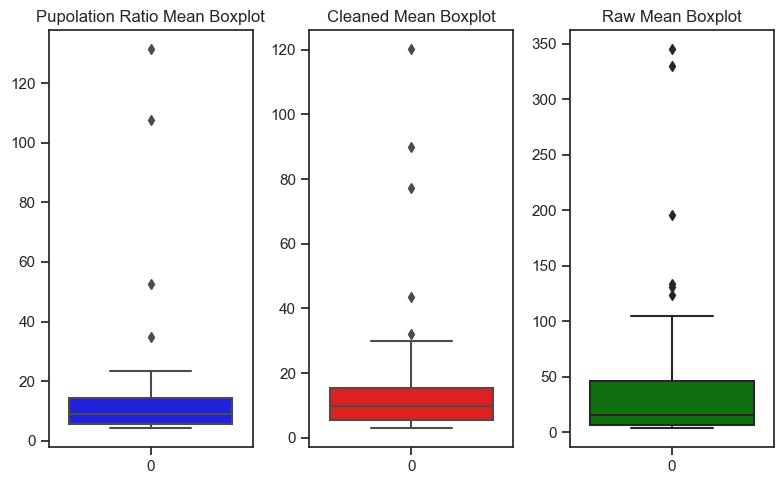

In [281]:
mean3 = merged.iloc[:, 2:55].sum()

fig, axes = plt.subplots(1, 3, figsize=(8, 5))

sns.boxplot(data=mean3, color='blue', ax=axes[0])
axes[0].set_title('Pupolation Ratio Mean Boxplot')

sns.boxplot(data=mean2, color='red', ax=axes[1])
axes[1].set_title('Cleaned Mean Boxplot')

sns.boxplot(data=mean, color='green', ax=axes[2])
axes[2].set_title('Raw Mean Boxplot')

plt.subplots_adjust(wspace=0.5)

plt.tight_layout()
plt.show()


In the figure you can observe how the values are distributed using different approaches

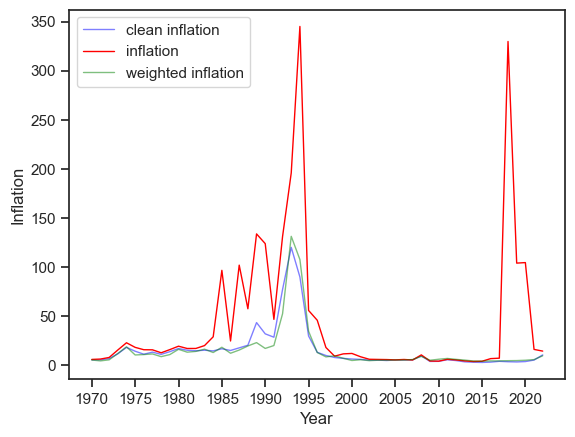

In [280]:
sns.set_style("ticks")

colors = ["blue", "red", "green"]

linewidth = 1

sns.lineplot(data=mean2, color=colors[0], linewidth=linewidth, label="clean inflation", alpha = 0.5)

sns.lineplot(data=mean, color=colors[1], linewidth=linewidth, label="inflation")

sns.lineplot(data=mean3, color=colors[2], linewidth=linewidth, label="weighted inflation", alpha = 0.5)

plt.xlabel("Year")
plt.ylabel("Inflation")
plt.legend()

plt.xticks(mean2.index[::5])

plt.show(block=False)